### Joshua Campos - Nr. 304738

# Exercise 2 - ML Programming Lab

## 1.1 Pandas (10 Points)

We need to import all the main libraries you will be using, such as Numpy, Pandas and Matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We read the data file called 'imports-85.data' using Pandas built-in function and at the same time, we define the names of the columns, as the file we imported doesn't give this information.

In [2]:
auto_imports = pd.read_csv('imports-85.data', \
                           names=['symboling','normalized-losses','make','fuel-type',\
                            'aspiration','num-of-doors','body-style','drive-wheels',\
                            'engine-location','wheel-base','length','width','height',\
                            'curb-weight','engine-type','num-of-cylinders','engine-size',\
                            'fuel-system','bore','stroke','compression-ratio','horsepower',\
                            'peak-rpm','city-mpg','highway-mpg','price'])

For the first exercise, we need to calculate the mean, median and standard deviation of each numeric column. To do this we can start by creating a new dataframe with only the columns that have continous values, as defined in the information file for the data set. This will give us a dataframe with 15 columns.

In [3]:
numeric_columns = auto_imports[['normalized-losses','wheel-base','length','width','height',\
                                'curb-weight','engine-size','bore','stroke','compression-ratio',\
                                'horsepower','peak-rpm','city-mpg','highway-mpg','price']]

We can't just use pandas built-in functions for the mean, median and standard deviation on our new dataframe, as not all columns are numeric values just yet; this is because several columns have questions marks for missing values, so this symbols interfere with out data types. 

To fix this, we created a function that loops through all columns, removing the question marks (so we don't take these rows into account for our calculations) and converting the columns to numeric values once we got rid of the questions marks. 

Having done this, we can now calculate the mean, median and standard deviation of our columns.
We insert these values into a pre-defined dataframe and return this dataframe at the end of our function.

In [4]:
def calculate(numeric_columns):
    
    calculations = pd.DataFrame(data=None, index=['Mean','Median','Standard Deviation'], columns=None)
    
    for column in numeric_columns:
        mean = pd.to_numeric(numeric_columns[column][numeric_columns[column]!='?']).mean()
        median = pd.to_numeric(numeric_columns[column][numeric_columns[column]!='?']).median()
        stddev = pd.to_numeric(numeric_columns[column][numeric_columns[column]!='?']).std()
        
        calculations[column] = [mean,median,stddev]
    
    return calculations


print(calculate(numeric_columns))

                    normalized-losses  wheel-base      length      width  \
Mean                       122.000000   98.756585  174.049268  65.907805   
Median                     115.000000   97.000000  173.200000  65.500000   
Standard Deviation          35.442168    6.021776   12.337289   2.145204   

                       height  curb-weight  engine-size      bore    stroke  \
Mean                53.724878  2555.565854   126.907317  3.329751  3.255423   
Median              54.100000  2414.000000   120.000000  3.310000  3.290000   
Standard Deviation   2.443522   520.680204    41.642693  0.273539  0.316717   

                    compression-ratio  horsepower     peak-rpm   city-mpg  \
Mean                        10.142537  104.256158  5125.369458  25.219512   
Median                       9.000000   95.000000  5200.000000  24.000000   
Standard Deviation           3.972040   39.714369   479.334560   6.542142   

                    highway-mpg         price  
Mean                 

D:\Users\Joshua\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


For the second exercise, we have to group by the 'make' column and calculate the average of 'price', 'highway-mpg' and 'city-mpg'. One way to do it is to create a new dataframe that includes these four columns, but at the same time, we have to get rid of the missing values that are present in 'price', so we can make our calculations successfully. Once we got rid of the questions marks, we can convert the column into numeric values. 

Now that we have a clean dataframe with 'make' and our three numeric columns, we can group them and use Pandas built-in function to calculate the average.

In [5]:
df_make_mpgs_price = auto_imports[['make','city-mpg','highway-mpg','price']]\
                                    [auto_imports['price']!='?']
df_make_mpgs_price['price'] = pd.to_numeric(df_make_mpgs_price['price'])
df_groupby_make_mean = df_make_mpgs_price.groupby('make').mean()

df_groupby_make_mean

,city-mpg,highway-mpg,price
make,,,
alfa-romero,20.333333,26.666667,15498.333333
audi,19.333333,24.500000,17859.166667
bmw,19.375000,25.375000,26118.750000
chevrolet,41.000000,46.333333,6007.000000
dodge,28.000000,34.111111,7875.444444
honda,30.384615,35.461538,8184.692308
isuzu,24.000000,29.000000,8916.500000
jaguar,14.333333,18.333333,34600.000000
mazda,25.705882,31.941176,10652.882353


For the next exercise, we have to use Seaborn to creat a pair plot of all the columns that have int64 data type. To know which columns have int64 data types, we can check the dataframe attribute '.dtypes' which shows the datatypes for all the columns. 

In [6]:
auto_imports.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Now that we know which columns have int64 data types, we can create a new dataframe that includes all five columns: 'symboling', 'curb-weight', 'engine-size', 'city-mpg' and 'highway-mpg'. We can now import the Seaborn module and create a pair plot using our new dataframe. 

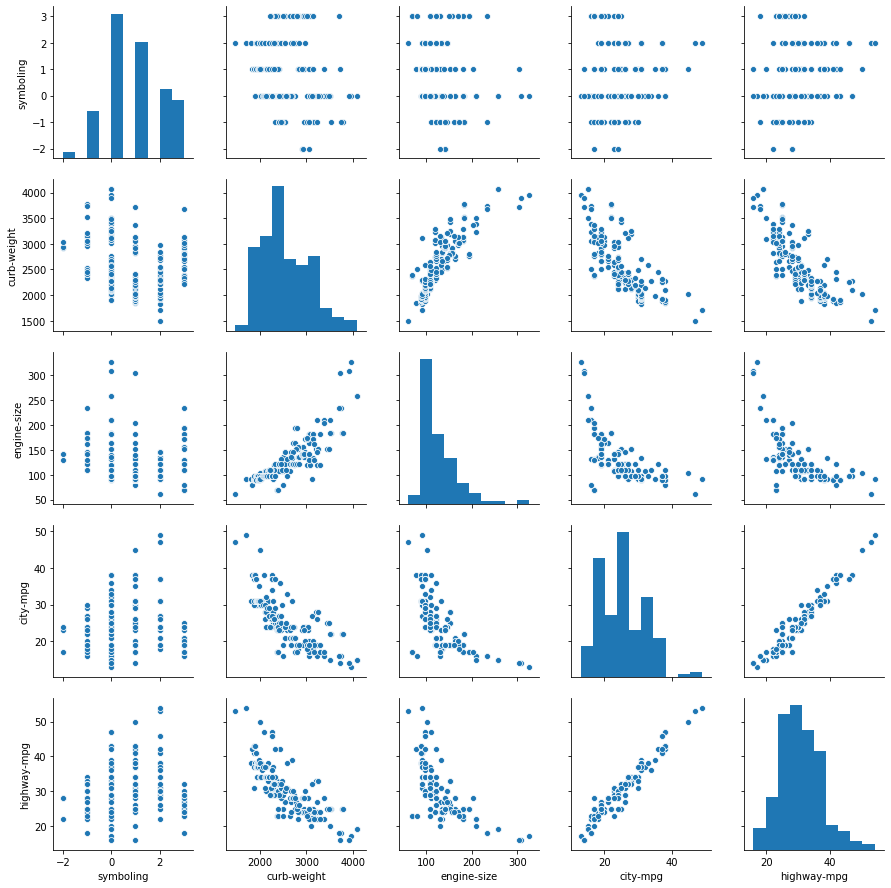

In [7]:
import seaborn as sns

df_int64 = auto_imports[['symboling','curb-weight','engine-size','city-mpg','highway-mpg']]
sns.pairplot(df_int64)

**Plot Explanation:** What a pair plot does is to plot each column against all others to find the relationship between each pair of columns of the dataframe. In our example, we have a dataframe with five columns, so our pair plot will show 25 plots. When a column is plotted against itself, it will plot a histogram to show the distribution of the data, but when it is plotted against the other columns, it plots a scatter plot to show the relationship that exists between both columns.

The most important information that we can obtain from this pair plot is the relationship between 'curb-weight', 'engine-size','city-mpg' and 'highway-mpg', as we can observe that between all of them there is a linear correlation. 

For the next exercise, we have to fit a simple linear regression using 'city-mpg' as our dependent variable and 'engine-size' as our independent variable. 

What we do now is implement the learn and predict simple linear regression algorithm that we used before to fit our linear regression to our data; after this, we plot our regression line on top of a scatter plot of our data to see how the model fit.

Text(0, 0.5, 'City MPG')

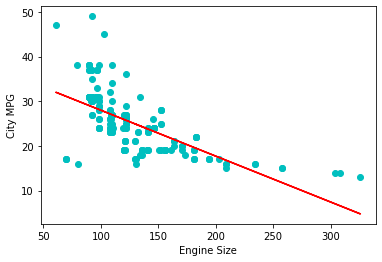

In [8]:
def learn_simple_linreg(x,y):
    x_mean = x.mean()
    y_mean = y.mean()
    
    b_1 = np.sum((x-x_mean)*(y-y_mean))/np.sum((x-x_mean)**2)
    b_0 = y_mean-b_1*x_mean
    
    return(b_0, b_1)

x = df_int64['engine-size']
y = df_int64['city-mpg']

b_0, b_1 = learn_simple_linreg(x,y)

def predict_simple_linreg(x):
    return b_0+b_1*x

y_predicted = predict_simple_linreg(x)

plt.scatter(x,y,color='c')
plt.plot(x,y_predicted, color='red')
plt.xlabel('Engine Size')
plt.ylabel('City MPG')

**Comment:** We can see that the regression line does not fit the behavior of the data very well. There are large error rates when the engine size is smaller and then again some larger error rates at the end, where the engine size is larger. By looking at the scatter plot, we can tell that the behavior of the data is more of a quadratic function, as it has a curvature. Instead of a simple linear regression model, we could use a polynomial linear regression of second degree, which would fit better the behavior of our data.

## 1.2 Linear Regression via Normal Equations (10 Points)

Before we start modelling, we need to make sure that our data is clean and ready. This is why we created a function to remove all the missing values (?) from the dataset. At the same time, we remove the column 'normalized-losses' from our data, because it has over 40 missing values, which would remove almost one fourth of our useful data. This means that we won't be using this column to fit our model.

In [9]:
def remove_question_marks(dataframe):
    old_dataframe = dataframe
    for column in dataframe:
        new_dataframe = old_dataframe[old_dataframe[column] != '?']
        old_dataframe=new_dataframe
    return new_dataframe

numeric_columns_clean = remove_question_marks(numeric_columns.iloc[:, numeric_columns.columns \
                                                                   != 'normalized-losses'])

D:\Users\Joshua\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


After removing the missing values, we see that not all columns that contain numbers are actually of numerical data type; this was caused by the questions marks that were present in the dataset before. Therefore, we create a function that loops through all columns converting all possible ones to numerical types.

In [10]:
def convert_dataframe_to_numeric(dataframe):
    numeric_dataframe = dataframe
    for column in dataframe:
        try:
            numeric_dataframe[column] = pd.to_numeric(dataframe[column])
        except ValueError:
            pass
    return numeric_dataframe

numeric_columns_clean = convert_dataframe_to_numeric(numeric_columns_clean)

In order to decide which variables we should use for our model, we created two functions: 

1. The first one checks the significance level of each variable against price using 'pearsonr' function and comparing the p-value to decide if it is significant or not. We decided not to use this function because it recommended us to use nine columns (p-value < 0.05), which might be too many for our model. 

In [11]:
from scipy.stats import pearsonr

def check_significance_levels(x_data, y_data, significance_level):
    significant_columns = []
    for column in x_data:
        coeff, pvalue = pearsonr(x_data[column],y_data)
        if pvalue < significance_level:
            significant_columns.append(column)
    return significant_columns

2. The second function checks the correlation coefficient of each variable against price using 'pearsonr' function and comparing the coefficient to decide if it is significant or not. We decided to use this function because it recommended us to use three columns instead (coefficient > 0.8) and gave us a better fit. 

In [12]:
def check_correlation_coefficients(x_data, y_data, minimum_ratio):
    significant_columns = []
    for column in x_data:
        coeff, pvalue = pearsonr(x_data[column],y_data)
        if coeff > minimum_ratio:
            significant_columns.append(column)
    return significant_columns

We had to create the independent variable dataframe (x_data), which includes all numeric columns, except for 'price'. We also created the dependent variable dataframe (y_data), which includes 'price' only. 

After that we proceeded to check the correlation coefficients and choose which columns would be used for our model, which are 'curb-weight', 'engine-size' and 'horsepower'. 

In [13]:
x_data = numeric_columns_clean.iloc[:,:-1]
y_data = numeric_columns_clean.iloc[:,-1]

#significant_columns = check_significance_levels(x_data,y_data,0.05)
significant_columns = check_correlation_coefficients(x_data,y_data,0.8)

x_data = x_data[significant_columns]
x_data.columns

Index(['curb-weight', 'engine-size', 'horsepower'], dtype='object')

Now that we have 'x_data' and 'y_data', we should divide both dataframes into training and testing data. To do this, we create a random selection of 80% of the rows for the training sets and the remaining rows are used for the testing set. 

In [14]:
row_selection = np.random.rand(len(numeric_columns_clean)) < 0.8

x_train = x_data[row_selection]
y_train = y_data[row_selection]

x_test = x_data[~row_selection]
y_test = y_data[~row_selection]

---------

The following function predicts the values for 'y', given the 'x' data and the coefficients for each independent variable. It loops and calculates individual values and create a prediction array. We define the function here, because we will be using it several times with different learning algorithms. 

In [15]:
def predict_multiple_linear_regression(x_data, coefficients):
    y_predicted=[]
    prediction=coefficients[0][0]
    
    for i in range(len(x_data)):
        for n in range(len(x_data.columns)):
            prediction += coefficients[n+1][0]*x_data.iloc[i,n]
        y_predicted.append(prediction)
        prediction=coefficients[0][0]
    
    return np.array(y_predicted)

Here we create three functions, one to calculate the average residual, another to calculate the RMSE and the last one to plot the residuals. We put these functions here, because we will be using them several times in the future.

In [16]:
def calculate_average_residual(y,y_predicted):
    return np.mean(y-y_predicted)

def calculate_rmse(y,y_predicted):
    return np.sqrt(np.sum((y-y_predicted)**2)/y.size)

def plot_residuals(y,y_predicted):
    residual=y-y_predicted
    plt.scatter(y,residual,color='c')
    plt.plot(y,np.zeros(len(y),),color='r')

#### A. Generic Learning Function

To fit our model, we first created a generic function that creates the matrices (Xt_X and Xt_y) following the system of linear equations. Then, we use Numpy's built-in function to solve the linear algebra equations, given the matrices mentioned before. This function is used as a base for comparing the other functions and their results.

In [17]:
def learn_linreg_normeq(x_train,y_train):
    X = np.ones([len(x_train),1])
    
    for i in range(len(x_train.columns)):
        x = np.array(x_train.iloc[:,i]).reshape(len(x_train),1)
        X = np.concatenate((X,x),axis=1)
    
    y = np.array(y_train).reshape(len(y_train),1)
    X_transpose = X.T
    Xt_X = np.matmul(X_transpose,X)
    Xt_y = np.matmul(X_transpose,y)
    
    coefficients = np.linalg.solve(Xt_X, Xt_y)
    
    return coefficients

Here we fit our model, predict with it, calculate the average residual, as well as the RMSE, and then plot the residuals to see how well our model performed. 

Average Residual: -391.46104165930046
RMSE: 3003.713297608102


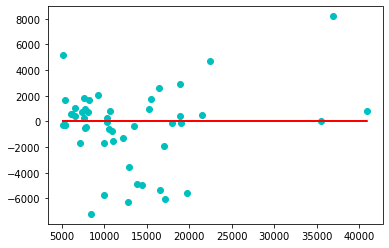

In [18]:
coefficients_generic = learn_linreg_normeq(x_train,y_train)

y_predicted_generic = predict_multiple_linear_regression(x_test,coefficients_generic)

avg_res_generic = calculate_average_residual(y_test,y_predicted_generic)

rmse_generic = calculate_rmse(y_test,y_predicted_generic)

plot_residuals(y_test,y_predicted_generic)

print('Average Residual: {}\nRMSE: {}'.format(avg_res_generic,rmse_generic))

#### B. Gaussian Elimination Learning Function

The following function implements Gaussian Elimination to calculate the coefficients:

In [19]:
def gaussian_elimination(A,b):
    n = len(A)
    
    for i in range(0, n):
        maximum_element = abs(A[i][i])
        maximum_row = i
        for k in range(i+1, n):
            if A[k][i] > maximum_element:
                maximum_element = A[k][i]
                maximum_row = k
        
        for k in range(i, n):
            temp = A[maximum_row][k]
            A[maximum_row][k] = A[i][k]
            A[i][k] = temp
            
        for k in range(i+1, n):
            c = -A[k][i]/A[i][i]
            for j in range(i, n):
                if i == j:
                    A[k][j] = 0
                else:
                    A[k][j] += c*A[i][j]
                    
    for i in range(n - 1, -1, -1):
        for j in range(i + 1, n):
            temp = A[i][j]
            for k in range(len(b[0])):
                b[i][k] -= temp*b[j][k]
        temp = 1/A[i][i]
        for j in range(len(b[0])):
            b[i][j] *= temp
    
    return b

#Code based on: https://martin-thoma.com/images/2013/05/Gaussian-elimination.png

This function fits our data using the Gaussian Elimination algorithm to calculate the coefficients.

In [20]:
def learn_linreg_normeq_gaussian_elim(x_train,y_train):
    X = np.ones([len(x_train),1])
    
    for i in range(len(x_train.columns)):
        x = np.array(x_train.iloc[:,i]).reshape(len(x_train),1)
        X = np.concatenate((X,x),axis=1)
    
    y = np.array(y_train).reshape(len(y_train),1)
    X_transpose = X.T
    Xt_X = np.matmul(X_transpose,X)
    Xt_y = np.matmul(X_transpose,y)
    
    coefficients = gaussian_elimination(Xt_X,Xt_y)
    
    return coefficients

Here we fit our model, predict with it, calculate the average residual, as well as the RMSE, and then plot the residuals to see how well our model performed. 

Average Residual: -1164300.1716300491
RMSE: 7288418.304292335


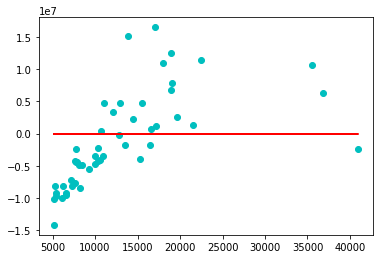

In [21]:
coefficients_gaussian = learn_linreg_normeq_gaussian_elim(x_train,y_train)

y_predicted_gaussian = predict_multiple_linear_regression(x_test,coefficients_gaussian)

avg_res_gaussian = calculate_average_residual(y_test,y_predicted_gaussian)

rmse_gaussian = calculate_rmse(y_test,y_predicted_gaussian)

plot_residuals(y_test,y_predicted_gaussian)

print('Average Residual: {}\nRMSE: {}'.format(avg_res_gaussian,rmse_gaussian))

#### C. QR Decomposition Learning Function

The following function implements QR Decomposition to calculate the coefficients:

In [22]:
def qr_decomposition(A,b):
    n = len(A)
    R = np.zeros((n,n))
    Q = np.zeros((n,n))
    
    for k in range(0,n):
        s = 0
        for j in range(0,n):
            s = s + (A[j][k])**2
            R[k][k] = np.sqrt(s)
        for j in range(0,n):
            Q[j][k] = A[j][k]/R[k][k]
        for i in range(k+1,n):
            s = 0
            for j in range(0,n):
                s = s + A[j][i]*Q[j][k]
            R[k][i] = s
            for j in range(0,n):
                A[j][i] = A[j][i] - R[k][i]*Q[j][k]
    
    p = np.dot(Q.T, b)
    coefficients = np.dot(np.linalg.inv(R), p)
    
    return coefficients

#Code based on: http://people.inf.ethz.ch/gander/papers/qrneu.pdf

This function fits our data using the QR Decomposition algorithm to calculate the coefficients.

In [23]:
def learn_linreg_normeq_qr_decomposition(x_train,y_train):
    X = np.ones([len(x_train),1])
    
    for i in range(len(x_train.columns)):
        x = np.array(x_train.iloc[:,i]).reshape(len(x_train),1)
        X = np.concatenate((X,x),axis=1)
    
    y = np.array(y_train).reshape(len(y_train),1)
    X_transpose = X.T
    Xt_X = np.matmul(X_transpose,X)
    Xt_y = np.matmul(X_transpose,y)
    
    coefficients = qr_decomposition(Xt_X,Xt_y)
    
    return coefficients

Here we fit our model, predict with it, calculate the average residual, as well as the RMSE, and then plot the residuals to see how well our model performed. 

Average Residual: -391.46040035510816
RMSE: 3003.713809383058


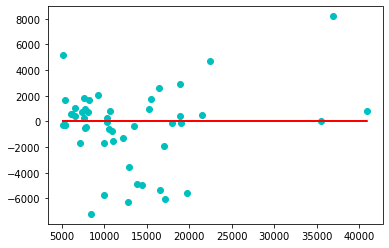

In [24]:
coefficients_qr = learn_linreg_normeq_qr_decomposition(x_train,y_train)

y_predicted_qr = predict_multiple_linear_regression(x_test,coefficients_qr)

avg_res_qr = calculate_average_residual(y_test,y_predicted_qr)

rmse_qr = calculate_rmse(y_test,y_predicted_qr)

plot_residuals(y_test,y_predicted_qr)

print('Average Residual: {}\nRMSE: {}'.format(avg_res_qr,rmse_qr))

------------

This section is a test to check how well our models performed against the SciKit Machine Learning library. We create, fit and predict our model; then we check the average residual as well as the RMSE, like we did with our models, and then plot the residuals. 

Average Residual: -391.4610416592974
RMSE: 3003.7132976081007


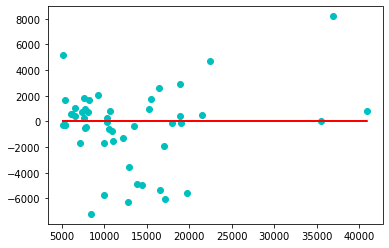

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
scikit_predictions = model.predict(x_test)

avg_res_sk = calculate_average_residual(y_test,scikit_predictions)

rmse_sk = calculate_rmse(y_test,scikit_predictions)

plot_residuals(y_test,scikit_predictions)

print('Average Residual: {}\nRMSE: {}'.format(avg_res_sk,rmse_sk))